<a href="https://colab.research.google.com/github/neohack22/IASD/blob/IA/IA/projects/presentation/privacy/PRIVACY_Notebook_5_Differential_Privacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differential Privacy

Among the numerous definitions of private data analysis,
differential privacy has become the dominant standard by providing a formal and adaptive conception of safe data-analysis. First introduced by Dwork et al. in [1], and further detailed in [2]. It states that an algorithm is  differentially private if, given two **close** databases, it produces statistically indistinguishable outputs.
Formally, a randomized algorithm $\mathcal{A}$ is $\epsilon$-differentially private if for any output $Z$ and for any two close databases $X$ and $X'$, $$\mathbb{P}[\mathcal{A}(X) \in Z] \leq e^{\epsilon}\mathbb{P}\left[\mathcal{A}(X') \in Z\right]. \text{   } (1)$$
Where the probability space is over the coin flips of $\mathcal{A}$.

Here, $\mathbb{P}[\mathcal{A}(X) \in Z]$ is the probability of a
randomized function $\mathcal{A}$ to ouput a value in $Z$ when evaluating
it on a given dataset $X$. The right side is identical to the left except
that the function is now evaluated on a dataset $X'$ that differs from $X$
in at most one element (hence the notion of **closeness**). And finally, $\epsilon$ is a parameter that describes
how much information is leaked by the function.

Sounds pretty abstract, so let's work out a simple example: let's assume we want to build a differentially private dataset from the adult data that we've looked at in the first session. The goal here is to protect an adversary from gaining too much information about the sensitive attribute (income > 50k or not) when adding that Alice's data to the dataset. With differential privacy, we look at the state of the dataset before and after Alice was added and quantify the privacy loss as given by equation (1). Let us suppose that $\mathcal{A}$ outputs the total number of persons with income > 50k in deterministic fashion. Then by simply comparing the output value of $\mathcal{A}$ before and after the adding Alice to the dataset, we can infer with certainty what kind of income Alice has. This highlights the fact that any deterministic analysis of a dataset represents a security breach, this is why the curator is needed to input some kind of randomness that will help preserving privacy.

Let us now investigate a simple randomization trick called **randomized response**. It works as follows:

* With probability $1-p$, we add a Alice's true income value to the database.
* With probability $p$ we choose a random boolean (0/1) value from a distribution returning $0$ with probability $q$ and $1$ with probability $1-q$ and add that value to the database instead.

**We denote 0/1 for generality, but for our application 1 means "income > 50k" and 0 means "income =< 50k"**

Using this scheme, an attacker cannot know with certainty if the real attribute value of Alice or a random one was added to the database. This protects the privacy of Alice but of course it also adds noise to the database, making it more difficult to use for legitimate users as well. In practice, we therefore always need to weigh privacy against utility when employing differential privacy. In this notebook, we will calculate the $\epsilon$ and other relevant parameters for our scheme above and see how we can use this differentially private data to make predictions about the 
income distribution of the people in our dataset.

* [1] [Differential privacy](https://www.microsoft.com/en-us/research/publication/differential-privacy/)
* [2] [The Algorithmic Foundations of Differential Privacy](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf)


## Calculating $\epsilon$

In our differentially private scheme, the probability of adding the true attribute value to the database is $1-p$. The probability of adding a random value is therefore $p$ and the probability of that value being $0$ is $q$. So how can we relate this to eq. (1)? Well, we can set $X$ and $X'$ as the versions of our database **before** and **after** adding Alice's data to it. Let's say that before adding Alice there are $k$ $1$'s in the database. We can then use a query $\mathcal{A}$ that returns the number of $1$'s in the database and choose our result set as $Z = \{n\}$. Before adding Alice to the database, $\mathcal{A}(X)=k$ with certainty, hence $\mathbb{P}(\mathcal{A}(X) = k)=1$. After adding Alice's data, the probability that the query result is still $k$ can be calculated as follows, depending on the Alice's attribute value:

* If Alice's attribute value is $0$, the probability that $\mathcal{A}$ is unchanged after adding the data to the database is given as $1-p+p\cdot q$.
* If a Alice's attribute value is $1$, the probability that $\mathcal{A}$ is unchanged after adding the data to the database is given as $p\cdot q$.

We therefore have the two equations

$$
\begin{eqnarray}
\mathbb{P}[\mathcal{A}(X) \in Z | x_i=1] & = & 1 \le \exp{\epsilon}\cdot \mathbb{P}[\mathcal{
A}(X') \in Z | x_i=1] = \exp{\epsilon}\cdot p \cdot q \\
\mathbb{P}[\mathcal{A}(X) \in Z | x_i=0] & = & 1 \le \exp{\epsilon}\cdot \mathbb{P}[\mathcal{A}(X') \in Z | x_i=0] = \exp{\epsilon}\cdot (1-p+p \cdot q) \\
\end{eqnarray}
$$

This leads to

$$
\begin{eqnarray}
 \epsilon & \ge & -\ln{\left(p \cdot q\right)} \\
 \epsilon & \ge & -\ln{\left(1-p+p\cdot q\right)} \\
\end{eqnarray}
$$

Since we're interested in an upper bound for $\epsilon$ and since $-\ln{\left(1-p+p\cdot q\right)} \le -\ln{p\cdot q}$, we get

$$
\begin{equation}
\epsilon = -\ln{\left(p\cdot q\right)}
\end{equation}
$$


## Exercise 

* To your point of view, what value of $\epsilon$ represent a good enough uncertainty for the adversary? 
* How does the level of privacy evolve when $\epsilon$ gets bigger/smaller? 
* Same question for the accuracy of $\mathcal{A}$.

*   Having a 50% chance that the data is true is a good trade-off between privacy and utility.<br>
To reach that, we could have 1-p, the probability of having true value, contributing to the half (1/4).<br>
That would make p = 3/4. To make the random boolean contribute the other half, we would need a third (1-q = 1/3) of the probability of having a random value (3/4 of the dataset) to be the true value, which gives q = 2/3.<br>
So a good enough uncertainty for the adversary would be inferior to ϵ=−ln(p⋅q) = - ln(1/2) = 0.69 .
*   ϵ being a parameter that describes how much information is leaked by the function, when ϵ gets smaller, the privacy gets bigger.
*   We learnt in the notebook 4 "that limit the amount of information that a legitimate user can learn from the data as well, so typically we need to balance the degree of privacy against the utility of the resulting data. Eventhough the data does not necessarily seem directly usable. However, it is still possible to identify trends, or perform general calculations or correlations on the whole table."<br>
So when ϵ gets smaller hence the privacy bigger, we can intuit that the accuracy of A can stay identical or get smaller.

## Exercise

**Write a function that returns the value of epsilon for a given $p$ and $q$.**

In [1]:
import numpy as np

def epsilon(p, q):
    """
    :param p: The probability of returning a random value instead of the true one
    :param q: The probability of returning 1 when generating a random value
    :returns: The epsilon for the given values of p, q
    """
    return -np.log(p*q)

print(epsilon(3/4,2/3))

0.6931471805599453


## Exercise

**Plot $\epsilon$ for various values of $p$ and $q$. Analyze.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


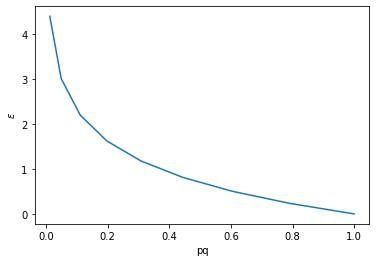

In [2]:
import matplotlib.pyplot as plt
p=np.linspace(0,1,10)
q=np.linspace(0,1,10)
X=p*q
Y=epsilon(p,q)
plt.figure()
plt.xlabel('pq')
plt.ylabel('$\epsilon$')

plt.plot(X,Y, label='courbe epsilon ')


# A Different Scheme

Let's assume we propose the following anonymization scheme for our dataset:

* With probability $1-p$, we add a person's true attribute value to the database
* With probability $p$, we do not add anything to the database

## Exercise

Can you calculate the $\epsilon$ of this scheme? Which scheme do you prefer, and why? Does this scheme always provide "plausible deniability"?


If the probability q of adding false information is null (as with the probability p, we don't add any randomness), then the product p*q is null.
As the logarithm of 0 doesn't exist, we can't calculate ϵ in this cheme.

We prefer the previous scheme, as this one offers no trade-off between privacy and utility.

This scheme never provides "plausible deniability" as the value added is always true son nothing changes within the dataset.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


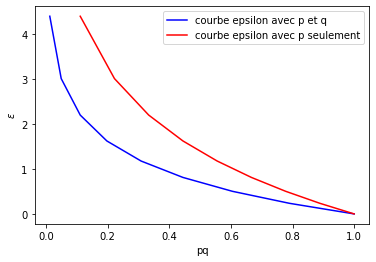

In [ ]:
#@title
p=np.linspace(0,1,10)
Y=-np.log(p)
plt.figure()
plt.xlabel('p')
plt.ylabel('$\epsilon$')

p=np.linspace(0,1,10)
q=np.linspace(0,1,10)
X=p*q
Y=epsilon(p,q)

plt.xlabel('pq')
plt.ylabel('$\epsilon$')

plt.plot(X,Y, c='blue', label='courbe epsilon avec p et q ')
plt.plot(p,Y, c='red',label='courbe epsilon avec p seulement')
plt.legend()

## What does this tell us?

Calculating the $\epsilon$ is great, but what does it actually tell us about the privacy loss or risk for our use case? Let's assume an adversary want to learn about the real value of a person's attribute. If she knows the model used for generating the data, she could then use Bayesian reasoning to calculate the probability of a person's attribute being $1$ given the observed difference in the database, which we denote $\Delta = \mathcal{A}(X') - \mathcal{A}(X)$. Using Bayes theorem we can calculate this as (for $\Delta = 1$ here)

$$
\begin{equation}
    P(x_i=1 | \Delta = 1) = P(\Delta = 1| x_i = 1)\cdot \frac{P(x_i=1)}{P(\Delta=1)}
\end{equation}
$$

For our scheme, we know that 

$$
\begin{equation}
    P(\Delta = 1 | x_i = \mathrm{1}) = 1-pq
\end{equation}
$$

and

$$
\begin{equation}
    P(\Delta = 1) = (1-p)\cdot P(x_i = \mathrm{1}) + p\cdot(1-q)
\end{equation}
$$

so we obtain

$$
\begin{equation}
    P(x_i=1 | \Delta = 1) = \frac{(1-pq)\cdot P(x_i = \mathrm{1})}{(1-p)\cdot P(x_i = \mathrm{1})+p\cdot(1-q)}
\end{equation}
$$

Let's see how this relates to $\epsilon$!

## Exercise

**Write a function that calculates the conditional probability as given in eq. (4).**

In [3]:
def p_cond(p, q, p_1):
    """
    :param   p: The probability of returning a random value instead of the true one
    :param   q: The probability of returning 1 when generating a random value
    :param p_1: The probability of a person to have an attribute value x_i=1
    """
    return ((1-p*q)*p_1)/((1-p)*p_1+p*(1-q))
print(p_cond(0.5,0.5,0.5))

0.75


## Exercise

**Choose a given q (e.g. 0.1) as well as a value for P(x_i=yes) and plot the conditional probability from eq. (4) as a function of p.**

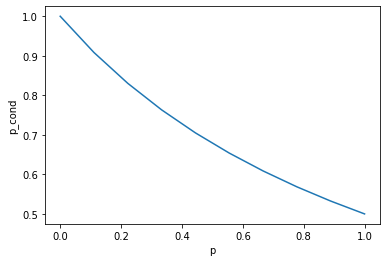

In [4]:
import matplotlib.pyplot as plt
qx=0.1
p_1=0.5
p=np.linspace(0,1,10)
Y=p_cond(p,qx,p_1)
plt.figure()
plt.xlabel('p')
plt.ylabel('p_cond')

plt.plot(p,Y, label='courbe proabablité conditionnelle')

# plus p est grand plus la proba conditionnelle est faible

# Implementing It

Now that we have a feeling for our scheme we can implement it! For that, we load the "adult census" data from the k-anonymity case study again.

In [6]:
import pandas as pd

names = (
    'age',
    'workclass', #Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'fnlwgt', # "weight" of that person in the dataset (i.e. how many people does that person represent) -> https://www.kansascityfed.org/research/datamuseum/cps/coreinfo/keyconcepts/weights
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
)
categorical = set((
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'sex',
    'native-country',
    'race',
    'income',
))
df = pd.read_csv(
    "/content/adult.all.txt", sep=" ", header=None, names=names, index_col=False, engine='python')

# We load the data using Pandas


df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50k
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50k


## Exercise

**Implement a function that processes a new value according to the differentially private scheme discussed above.**

In [7]:
def process_value(value, p, q):
    """
    :param value: The value to apply the differentially private scheme to.
    :param     p: The probability of returning a random value instead of the true one
    :param     q: The probability of returning 1 when generating a random value
    :    returns: A new, differentially private value
    """
# Random value with probability p to simulate p
    valeur_aleatoire_1 = np.random.rand()
    if p >= valeur_aleatoire_1:  # we are in the RANDOM VALUE case
      valeur_aleatoire_2 = np.random.rand() # to simulate q
      if q >= valeur_aleatoire_2:
        return 0
      return 1  
    else:
      return value

## Exercise

**Now apply this method to the "income" column of the adult dataset to obtain a differentially private dataset e.g with p=q=0.5.**

In [8]:
import pandas as pd
import numpy as np

df['income'].unique()
p=q=0.5
df['income_binaire']=np.where(df['income'] == '<=50k',0,1) 
df['income_diff_private']=df[
    'income_binaire'].apply(lambda x :process_value(x, p, q  ))

Liste_valeurs_calculées_DF=[]
for i, j in enumerate(df['income_binaire']):
    Liste_valeurs_calculées_DF.append (process_value(j, p, q))
df['income_diff_private'] = np.array(Liste_valeurs_calculées_DF)


df.describe() 

df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_binaire,income_diff_private
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50k,0,0
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50k,0,0
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50k,0,1
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50k,0,0
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50k,0,0


# Working With Differentially Private Data

After collecting the differentially private data, we want of course to make use of it! For example, we might want to estimate the probability of a person having an income > 50K based on the data we've collected, which we assume is Bernoulli distributed with a probability $p_{1}$ for every individual in the database. Now, when adding up the data from $n$ persons, the resulting value is binomially distributed. The mean of this distribution is given as $\mathbb{E}_{1} = n\cdot p_{1}$ and the variance as $\mathbb{V}_1 = n\cdot p_1 \cdot (1-p_1)$. A consistent and unbiased estimator of $\mathbb{E}_1$ is $\hat{\mathbb{E}}_{1} = \sum_i x_i$, which then gives an estimate for $p_{1}$ of $\hat{p}_{1} = \hat{\mathbb{E}}_1/n$.

Now, if we apply the differential privacy mechanism to our dataset, the probability of obtaining a $1$ will change to $p_{1,dp} = (1-p)\cdot p_{1}+p\cdot(1-q)$. Therefore, an unbiased and consistent estimator of $p_1$ based on $p_{1,dp}$ is given as
$$
\begin{equation}
\hat{p}_1 = \frac{\hat{p}_{1,dp}-p\cdot(1-q)}{1-p}
\end{equation}
$$

As before, $\hat{p}_{1,dp}=\sum_i x_{i,dp}/n$. Note that this naive estimator can return a negative probability, which can be avoided by using a more suitable method like a maximum likelihood estimator.

## Exercise

**Write an estimator for $\hat{p}_1$ based on a differentially private dataset with parameters $p$ and $k$..**

In [9]:
def p_1_estimator(p_1dp, p, q):
    """
    :param p_1dp: The empirical probability of x_i=1 of our DP dataset.
    :param     p: The p value of our DP scheme.
    :param     q: The q value of our DP scheme.
    :    returns: An estimate of p_1 of our DP dataset.
    """
    return  (p_1dp - p*(1 - q) ) / (1 - p)
    # p1_dp is based on data = sum of 1s / number of observations

print(p_1_estimator(0.1, 0.5, 0.5) )
# as indicated above values can be negative

-0.3


## Exercise

**Apply the estimator to the differentially private dataset created above to generate an estimate of $p_1$.**

In [10]:
p=q=0.5
n = len(df)
# original frequency of 1
p_1= df['income_binaire'].sum() / n
# frequency of 1 after diff privacy
p1_dp=df['income_diff_private'].sum() / n
# p1 estimated after differential privacy should be close to p1_dp
p_1_estimated=p_1_estimator(p1_dp,p,q)

print("la taille de l'échantillon est: ", n)
print("la fréquence réelle de 1 dans les données est:  {:.3f}  ".format(p_1))
print(
    "la fréquence réelle de 1 dans après dif privacy:  {:.3f}  ".format(p1_dp))
print(
    "la probabilité estimée de 1 après dif privacy est  {:.3f}  : ".format(
        p_1_estimated))

la taille de l'échantillon est:  48842
la fréquence réelle de 1 dans les données est:  0.239  
la fréquence réelle de 1 dans après dif privacy:  0.367  
la probabilité estimée de 1 après dif privacy est  0.235  : 


## Exercise

**Write a function that estimates the variance of $\hat{p}_{1}$ and calculate its value for the case above.**

Hint: The variance of $\hat{p}_1$ can be estimated as $$\hat{\mathrm{Var}}_1 = \frac{\hat{\mathrm{Var}}_{1,dp}}{(1-p)^2} = \frac{\hat{p}_{1,dp}\cdot(1-\hat{p}_{1,dp})}{(1-p)^2\cdot n}$$

In [11]:
def var_1_estimator(p_1dp, n, p, q):
    """
    :param p_1dp: The estimates probability of our DP dataset.
    :param     n: The number of samples in our dataset.
    :param     p: The p value of our DP scheme.
    :param     q: The q value of our DP scheme.
    :    returns: An estimate of the variance of our DP dataset.
    """
    return ( p1_dp*(1 - p1_dp)) / ( ((1 - p)**2) * n)
    
var_1_hat = var_1_estimator(p1_dp, len(df), p, q)
var_1_hat

1.903352184847242e-05

## Exercise

**Repeat the data generation process $N$ (e.g. 500) times. For each resulting dataset, estimate $\hat{p}_1$ and store the value in a list, so that we can plot it later.**

In [12]:
p=q=0.5
n = len(df)
p1_dp=df['income_diff_private'].sum() / n 
# start
p_1_hats=[]
for j in range(500):
  df[
      'income_diff_private']=df[
          'income_binaire'].apply(lambda x :process_value(x, p, q  ))
  """
    valeurs_calculées_par_DP = []
    for i, x in enumerate(df['income_binaire']):
        valeurs_calculées_par_DP.append (process_value(x, p, q))

    df['income_diff_private'] = np.array(valeurs_calculées_par_DP)
  """
  p_1dp = df['income_diff_private'].sum()/len(df)
  p_1_hat = p_1_estimator(p_1dp, p, q)
  p_1_hats.append(p_1_hat)
# we convert the list to ndarray numpy
p_1_hats = np.array(p_1_hats)

p_1_hats[0:20]

array([0.24419557, 0.23363089, 0.23449081, 0.24051022, 0.2421072 ,
       0.24071496, 0.24341755, 0.24010073, 0.2372753 , 0.24382703,
       0.24497359, 0.23686581, 0.23625159, 0.24476885, 0.23731624,
       0.24214815, 0.24665247, 0.24427747, 0.23518693, 0.24173867])

We then compare these estimates to the expected distribution (via central limit theorem: a normal distribution with expectation p_1 and variance var_1_hat)

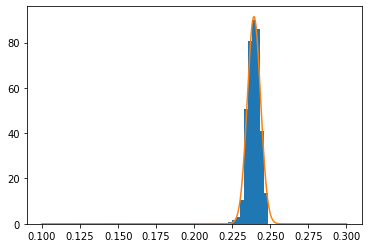

In [13]:
import matplotlib.pylab as plt

plt.hist(p_1_hats, density=True)

gauss = lambda x, mu, var: 1/np.sqrt(2*np.pi*var)*np.exp(-(x-mu)**2/(2*var))

p_1_hat = p_1_hats.mean()

x = np.linspace(0.1, 0.3, 1000)

plt.plot(x, gauss(x, p_1_hat, var_1_hat));

# Another scheme: Laplace mechanism. 

We can now estimate the probability of a categorial private feature from accuring in $X$. But what about numerical features? For example, let us suppose that the database $X$ contains the real people incomes. We still would like to be able to estimate the mean income of the population in a private way. First let us introduce what a Laplace distribution is. A Laplace distribution with scale $b$ that is the distribution with probability density 

$$Lap(x|b)=\frac{1}{2b}exp\left(-\frac{|x|}{b}\right).$$


To manage this kind of problem, we intoduce another simple randomization scheme called **Laplace mechanism**: 

* Sample $s$ a random noise from a laplace distribution with scale $\frac{\epsilon}{\Delta}$, where $\Delta$ is the maximum difference of income two people could have. For example we consider that the minimum income is $0$ and the maximum is 200 000 dollars, hence $\Delta=200 000$.
* Add $s$ to Alice's true income to get a private income for Alice. 

For this scheme, calculating $\epsilon$ is trivial, since it is directly in the distribution scale.

## Exercise (Bonus)

**Show that the Laplace mechanism makes data publishing $\epsilon$-differentially private**

Laplace mechanism is ϵ -differentially private with p = q = 1 and ϵ = 0.<br>
Indeed the probability p of adding a "random value" is certain as the span is always added.<br>
 What's more either and the probability of that value being  false  is  certain, if the span is not null (the addition being a bijection), or we're in the second scheme previously described (in case all numeric values are identical).

## Implementing it

To implement this scheme, we load a modified version of the "adult census" data from the k-anonymity where incomes are numerical. 

In [14]:
import pandas as pd

names = (
    'age',
    'workclass', #Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'fnlwgt', # "weight" of that person in the dataset (i.e. how many people does that person represent) -> https://www.kansascityfed.org/research/datamuseum/cps/coreinfo/keyconcepts/weights
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income-numerical',
)
categorical = set((
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'sex',
    'native-country',
    'race',
))
df = pd.read_csv("adult.all.numerical.txt", sep=" ", header=None, names=names, index_col=False, engine='python');# We load the data using Pandas

In [15]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-numerical
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,21467
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,33405
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,20462
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,22867
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,25853


## Exercise 

**Write a function that generates a random sample from a Laplace distribution with scale $b$.**

**Hint: You can use numpy.random or learn more about how to generate noises [here](https://en.wikipedia.org/wiki/Inverse_transform_sampling).**

In [16]:
def simlap(n, b):
    """
    :param     n: The number of samples to draw
    :param     b: Scale of the distribution.
    :    returns: a vector of size n with noises sample from laplace dristribution.
    """
    liste=[]
    for i in range(n):
# the noise does not depend on the numerical value in input, (compared to the diagram seen previously)      
      liste.append(np.random.laplace(loc=0.0, scale=b ))
    return liste

b takes into account epsilon and Delta (the span of the feature).
We return a list of "noises" that must then be added to the original dataset

We now plot the histogram of the sampled noise against the density of a laplace distribution to check if they match.

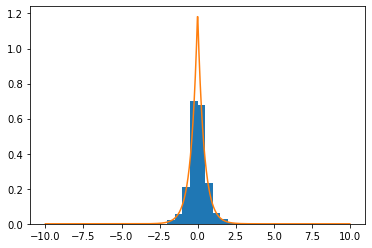

In [17]:
epsilon = df['income-numerical'].mean()
income_max = df['income-numerical'].max()
income_min = df['income-numerical'].min()
delta = income_max - income_min
#b=8*epsilon/delta  
b=1*epsilon/delta  

#b=1
# b contains epsilon and delta
n=1000

l = simlap(n,b)
plt.hist(l,  density=True, bins=[float(i)/2 for i in range(-20,21)])

laplace = lambda x, b: 1/(2*b)*np.exp(-np.abs(x)/b)

x = np.linspace(-10, 10, 1000)

plt.plot(x, laplace(x, b));

## Exercise

**Now apply Laplace mechanism to the "income-numerical" column of the adult dataset to obtain a differentially private dataset with $\epsilon =1$.**

In [18]:
import numpy as np

epsilon=1
Delta=df['income-numerical'].max() - df['income-numerical'].min()
b=epsilon
#b= epsilon # c'est le scale
print(b)
df[
    'Laplace_bruit'] = df[
        'income-numerical'].apply(
            lambda x : np.random.laplace(loc=0, scale=b) )
"""
Liste_bruits=[]
for i, j in enumerate(df['income-numerical']):
  Liste_bruits.append(np.random.laplace(loc=0, scale=b))
Liste_bruits= np.array(Liste_bruits)
"""
df['income_dp'] = df['income-numerical'] + df['Laplace_bruit']

1


## Exercise

**Compare a few of the lines from the private and non private columns. Would you say the data would still be useful for a statistical analysis? Compute the mean of each columns and discuss.**

In [19]:
df.describe()

df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-numerical,Laplace_bruit,income_dp
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,21467,3.457458,21470.457458
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,33405,0.147755,33405.147755
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,20462,1.108379,20463.108379
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,22867,-1.321340,22865.678660
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,25853,4.856084,25857.856084


In [23]:
print("income-numerical mean = ", df["income-numerical"].mean())
print("income_dp mean = ", df["income_dp"].mean())

income-numerical mean =  36968.47587068242
income_dp mean =  36968.48072970581


We manage to calculate a noise for each numeric value.
This noise seems weak and depends on delta (and epsilon), but not on the value itself. That would make the noise and the value Independent and identically distributed random variables.<br>
We can see that the means of private and non private columns are identical, even if their rows aren't so the noise doesn't impact the mean.<br>
We visualize that the distribution of the noise is normal. And The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed. The i.i.d. assumption is also used in central limit theorem, which states that the probability distribution of the sum (or average) of i.i.d. variables with finite variance approaches a normal distribution.<br>
Even if the sample comes from a more complex non-Gaussian distribution, we would say the data would still be useful for a statistical analysis because it can be simplified from the central limit theorem to Gaussian distribution. For a large number of observable samples, "the sum of many random variables will have an approximately normal distribution".<br>
Indeed the accuracy of the model depends on the distribution of the features, not on the actual values (reason why we can standardize numerical values for example to have a better representation).

# Bonus: Noisy Histogram

Read about the following [blog posts](https://desfontain.es/privacy/differential-privacy-awesomeness.html) (At least post 1 to 4). Can you compute a private histogram of the incomes of the dataset? 

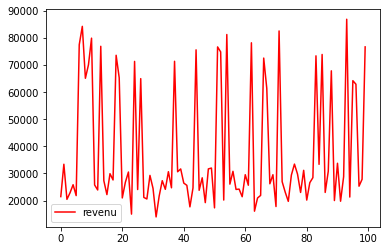

In [20]:
# we will display the first 100 values (out of 488841) and the noisy value
X=[i for i in range(0,100)]
Y=df['income-numerical']
Z=df['income_dp']
W=df['Laplace_bruit']
Y=Y[0:100]
Z=Z[0:100]
W=W[0:100]


plt.figure()
plt.plot(X,Y, c='red', label='income')
plt.legend()

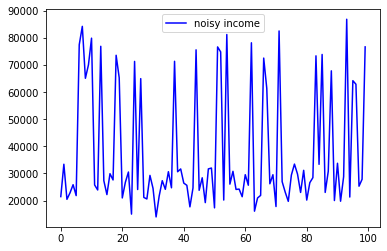

In [21]:
plt.plot(X,Z,c='blue', label='noisy income')
plt.legend()

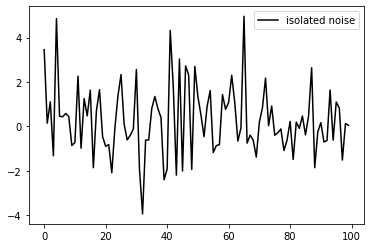

In [22]:
plt.plot(X,W,c='black', label='isolated noise')
plt.legend()

The first two curves represent the income and noisy income.<br>
The third curve represents noise. Values are indeed between -5 and +5 regardless of the true income.